<a href="https://archive.ics.uci.edu/ml/datasets/Abalone">Dataset Reference Link </a>

## Abalone

*Abalone is a type of sea snail that belongs to the Haliotidae family. It is known for its distinctive shell, which is characterized by a series of open holes or respiratory pores. These holes allow the abalone to exchange gases and expel waste products.__*

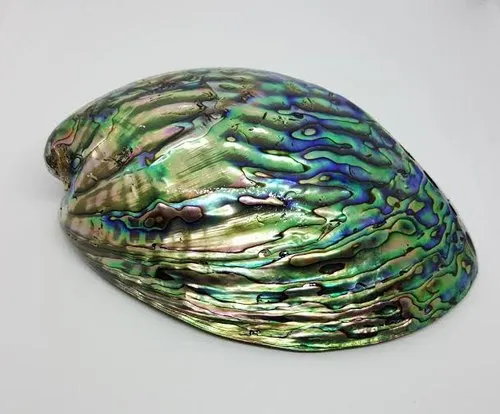

**Abalone shells are highly prized for their beauty and are often used in jewelry and decorative items. The shells have a colorful appearance, featuring a combination of iridescent colors such as blue, green, and pink. The inner layer of the shell, called nacre, is particularly valued for its shimmering luster.**

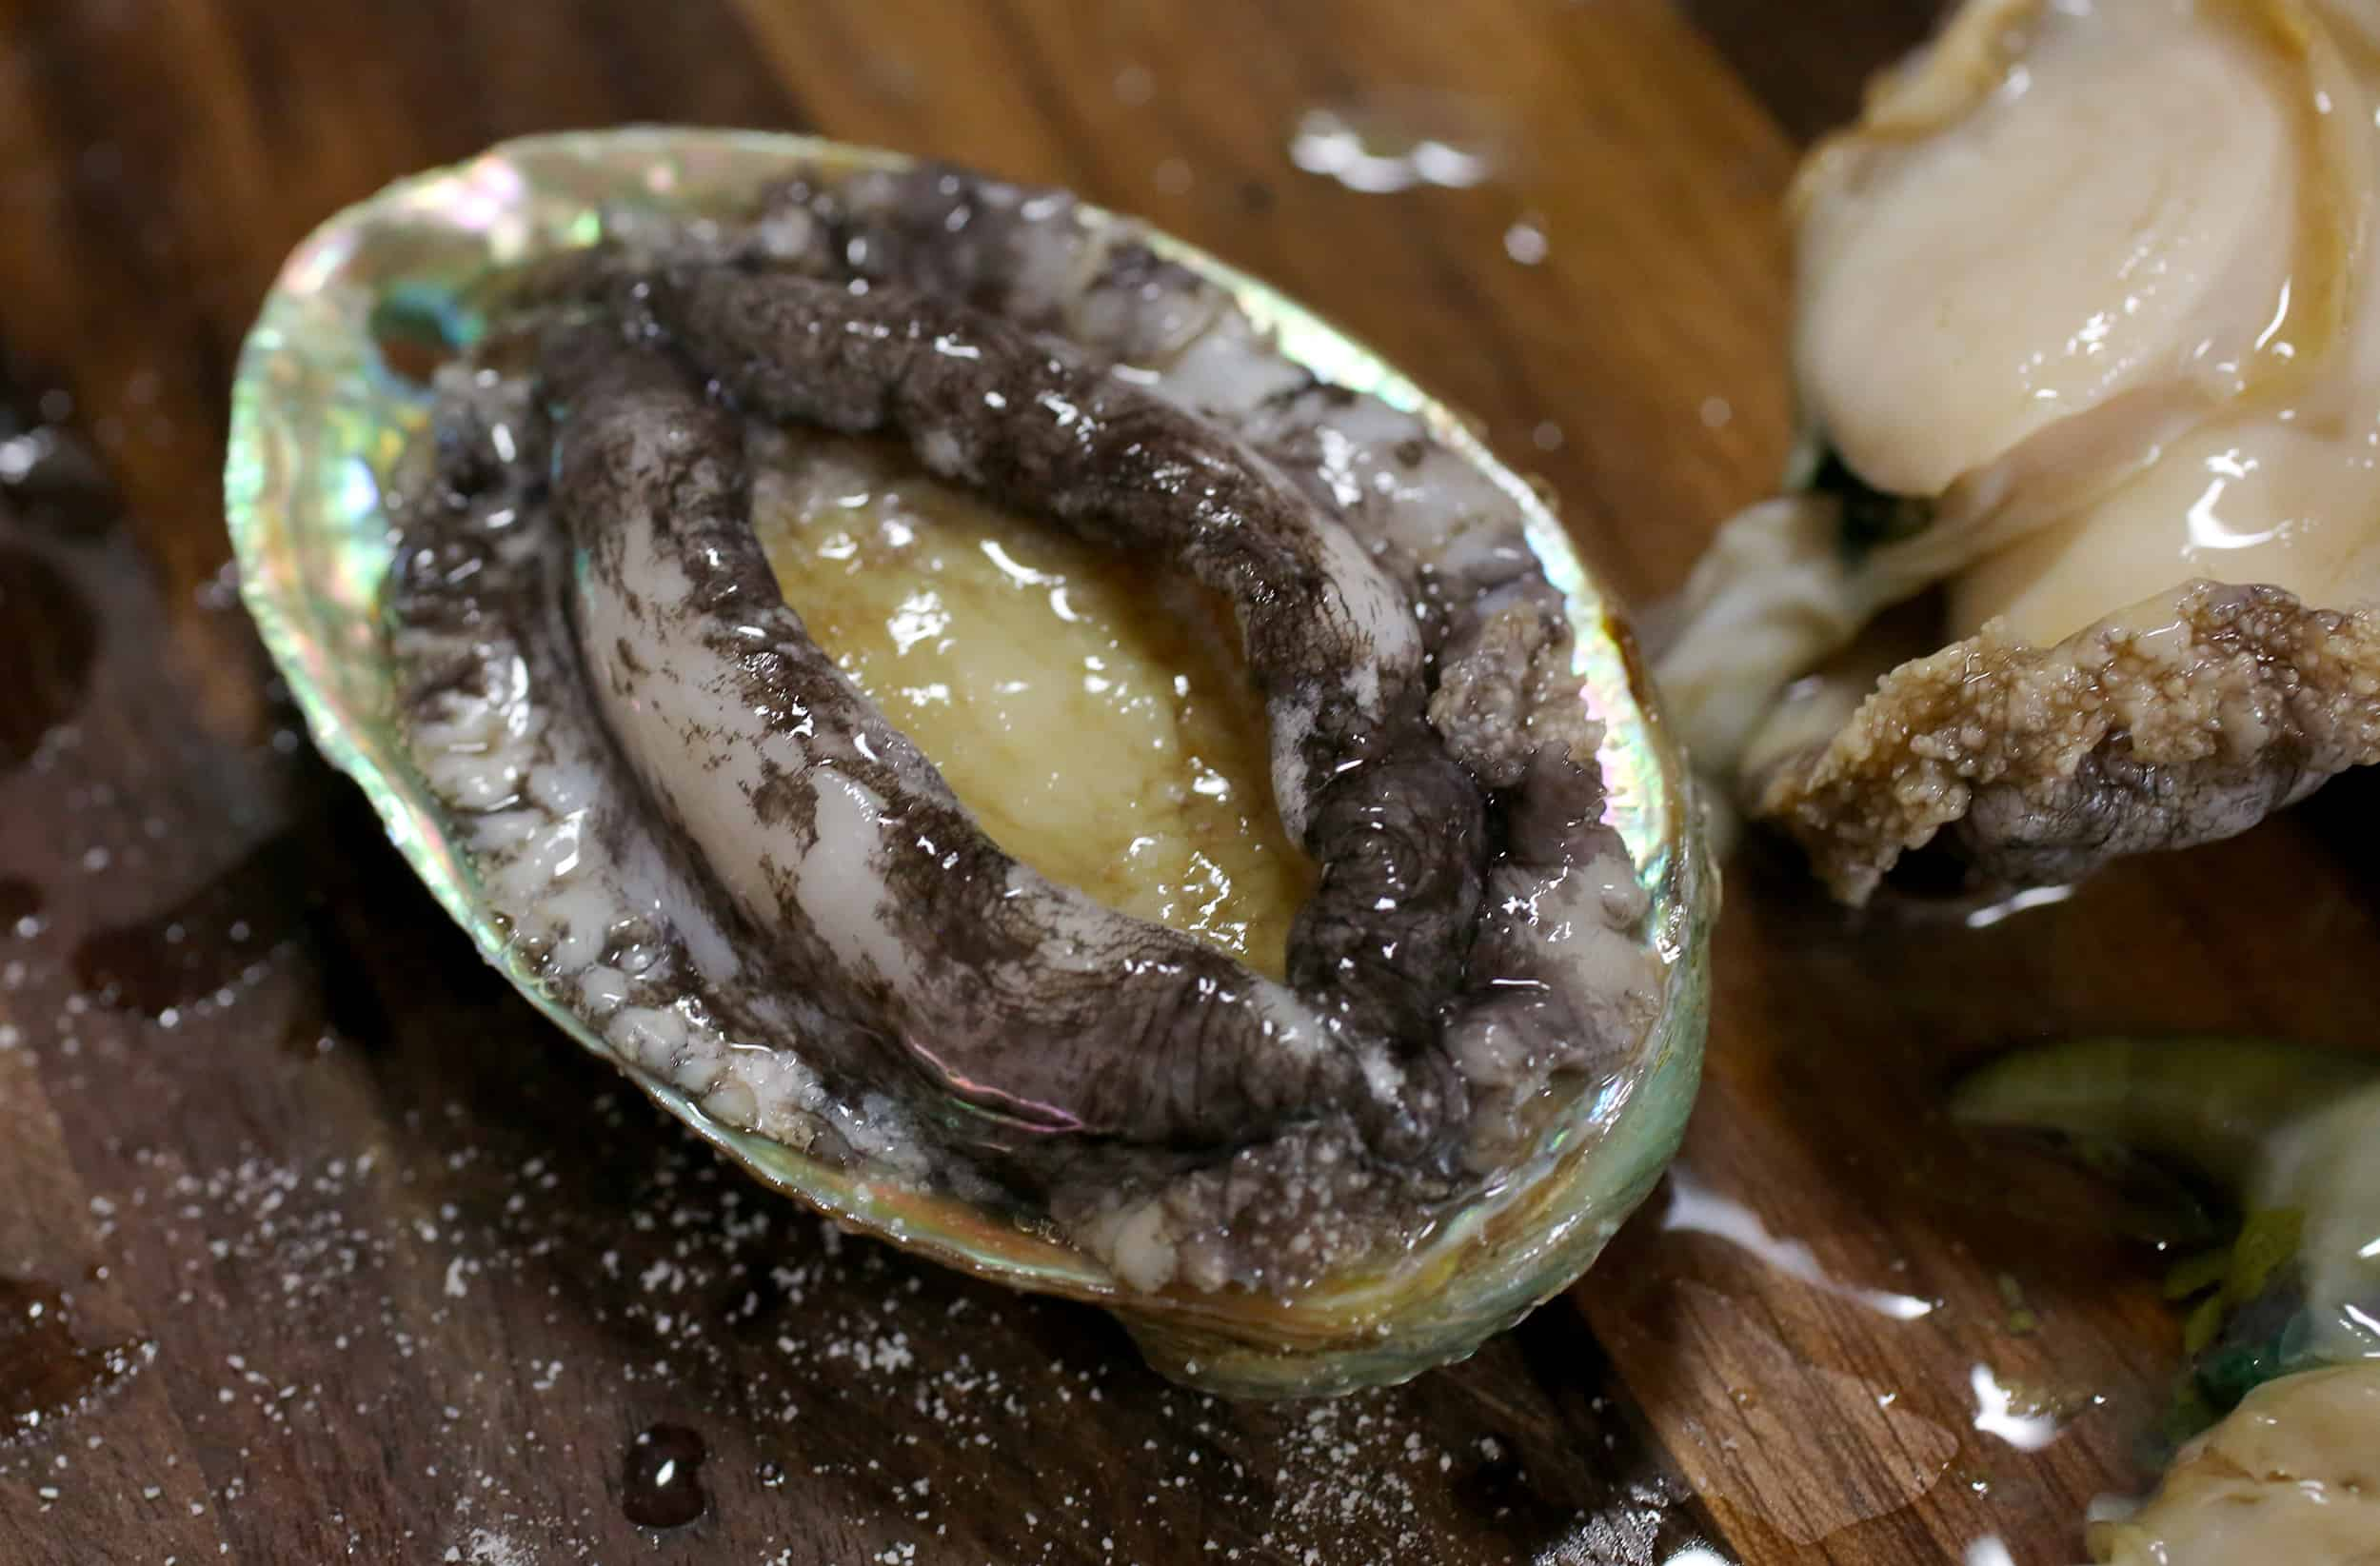

**Apart from their shells, abalones are also consumed as seafood in many cultures. The meat of abalone is considered a delicacy and is often used in various cuisines, including Asian and Mediterranean dishes. The meat is firm and tender with a slightly sweet and nutty flavor.**

## Objective
1. Predict the age of abalone shells.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# using pandas to read the csv file, there are no headers in raw file
df = pd.read_csv('../data/Raw Data/abalone_data.csv', header=None, 
                     names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
                         'viscera_weight', 'shell_weight', 'rings'])

| Attribute        | Description                                                                    |
|------------------|--------------------------------------------------------------------------------|
| Sex              |   Abalone are marine gastropod mollusks, and their reproductive system involves separate sexes, meaning there are male and female individuals. The process of sex in abalone involves fertilization, egg production, and sperm release.                                                   | 
| Length           |   The length of an abalone is typically measured as the maximum linear distance from one end of the shell to the other.                                                             |
| Diameter         |   The diameter of an abalone is measured as the maximum distance across the widest part of the shell. A measuring tool, such as a caliper or ruler, is placed perpendicular to the shell's aperture, and the measurement is taken from one edge to the opposite edge.                          |
| Height           |   The height (also known as depth) refers to the vertical distance from the highest point of the shell to the bottom surface. It is measured perpendicular to the horizontal plane of the shell.                                                                                       |
| Whole Weight     | The shucked weight of abalone refers to the weight of the abalone meat or flesh after it has been removed from the shell. It is the weight of the edible portion of the abalone, typically measured in grams or ounces, excluding the weight of the shell.                           |
| Viscera Weight   |  Viscera weight of an abalone refers to the weight of its internal organs or visceral mass, excluding the shell and meat. It includes organs such as the digestive system, reproductive organs, and other internal structures. Viscera weight is typically measured in grams or ounces as a separate component during abalone processing or analysis.                               |
| Shell Weight     |   Shell weight of an abalone refers to the weight of the abalone's shell alone, excluding the meat and internal organs. It represents the mass of the calcified structure that provides protection and support to the abalone's body. Shell weight is typically measured in grams or ounces during various scientific or commercial assessments.                                                |
| Rings            |    In abalones, rings refer to the concentric growth lines or bands visible on the inner surface of their shells. These rings, also known as growth rings or annual rings, are formed as the abalone grows and adds new shell material over time.                                            |


In [3]:
df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight   
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010  \
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
df.shape

(4177, 9)

There are total 4177 observations in the given dataset

In [5]:
df['rings'].value_counts()

rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

No. of rings determines the age of the abalone shell, each ring indicates approximately 1.5 years of age

# Data Preprocessing

In [6]:
#Checking Null Values in the data

df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [7]:
df.sex.nunique()

3

In [8]:
df.rings.nunique()


28

In [9]:
df.describe()

length     diameter       height  whole_weight  shucked_weight   
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000  \
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [10]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='count'>

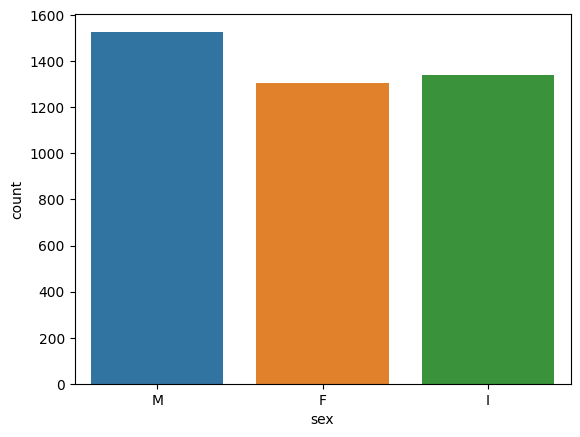

In [11]:
sns.countplot(x=df['sex'])

<Axes: xlabel='rings', ylabel='count'>

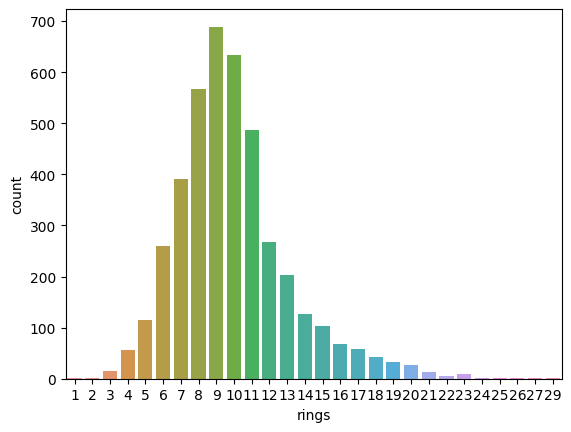

In [12]:
sns.countplot(x=df['rings'])

# Data Normalization - Normal Distribution

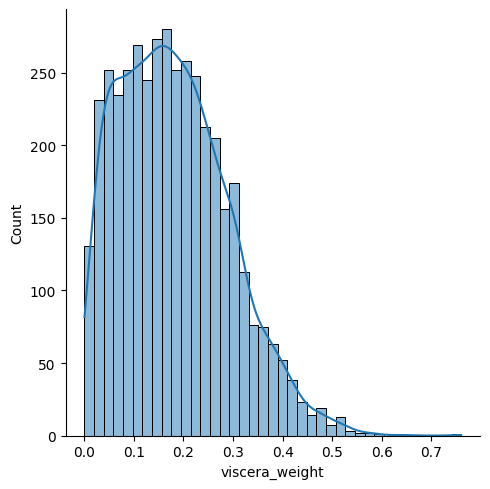

In [13]:
sns.displot(data=df, x="viscera_weight", kde=True)

In [14]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(df['viscera_weight'])

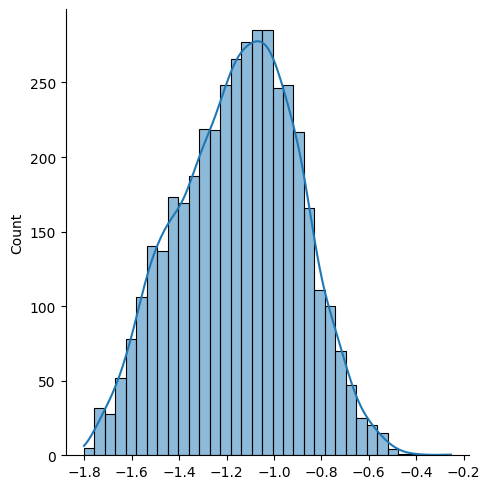

In [15]:
sns.displot(data=fitted_data, kde=True)

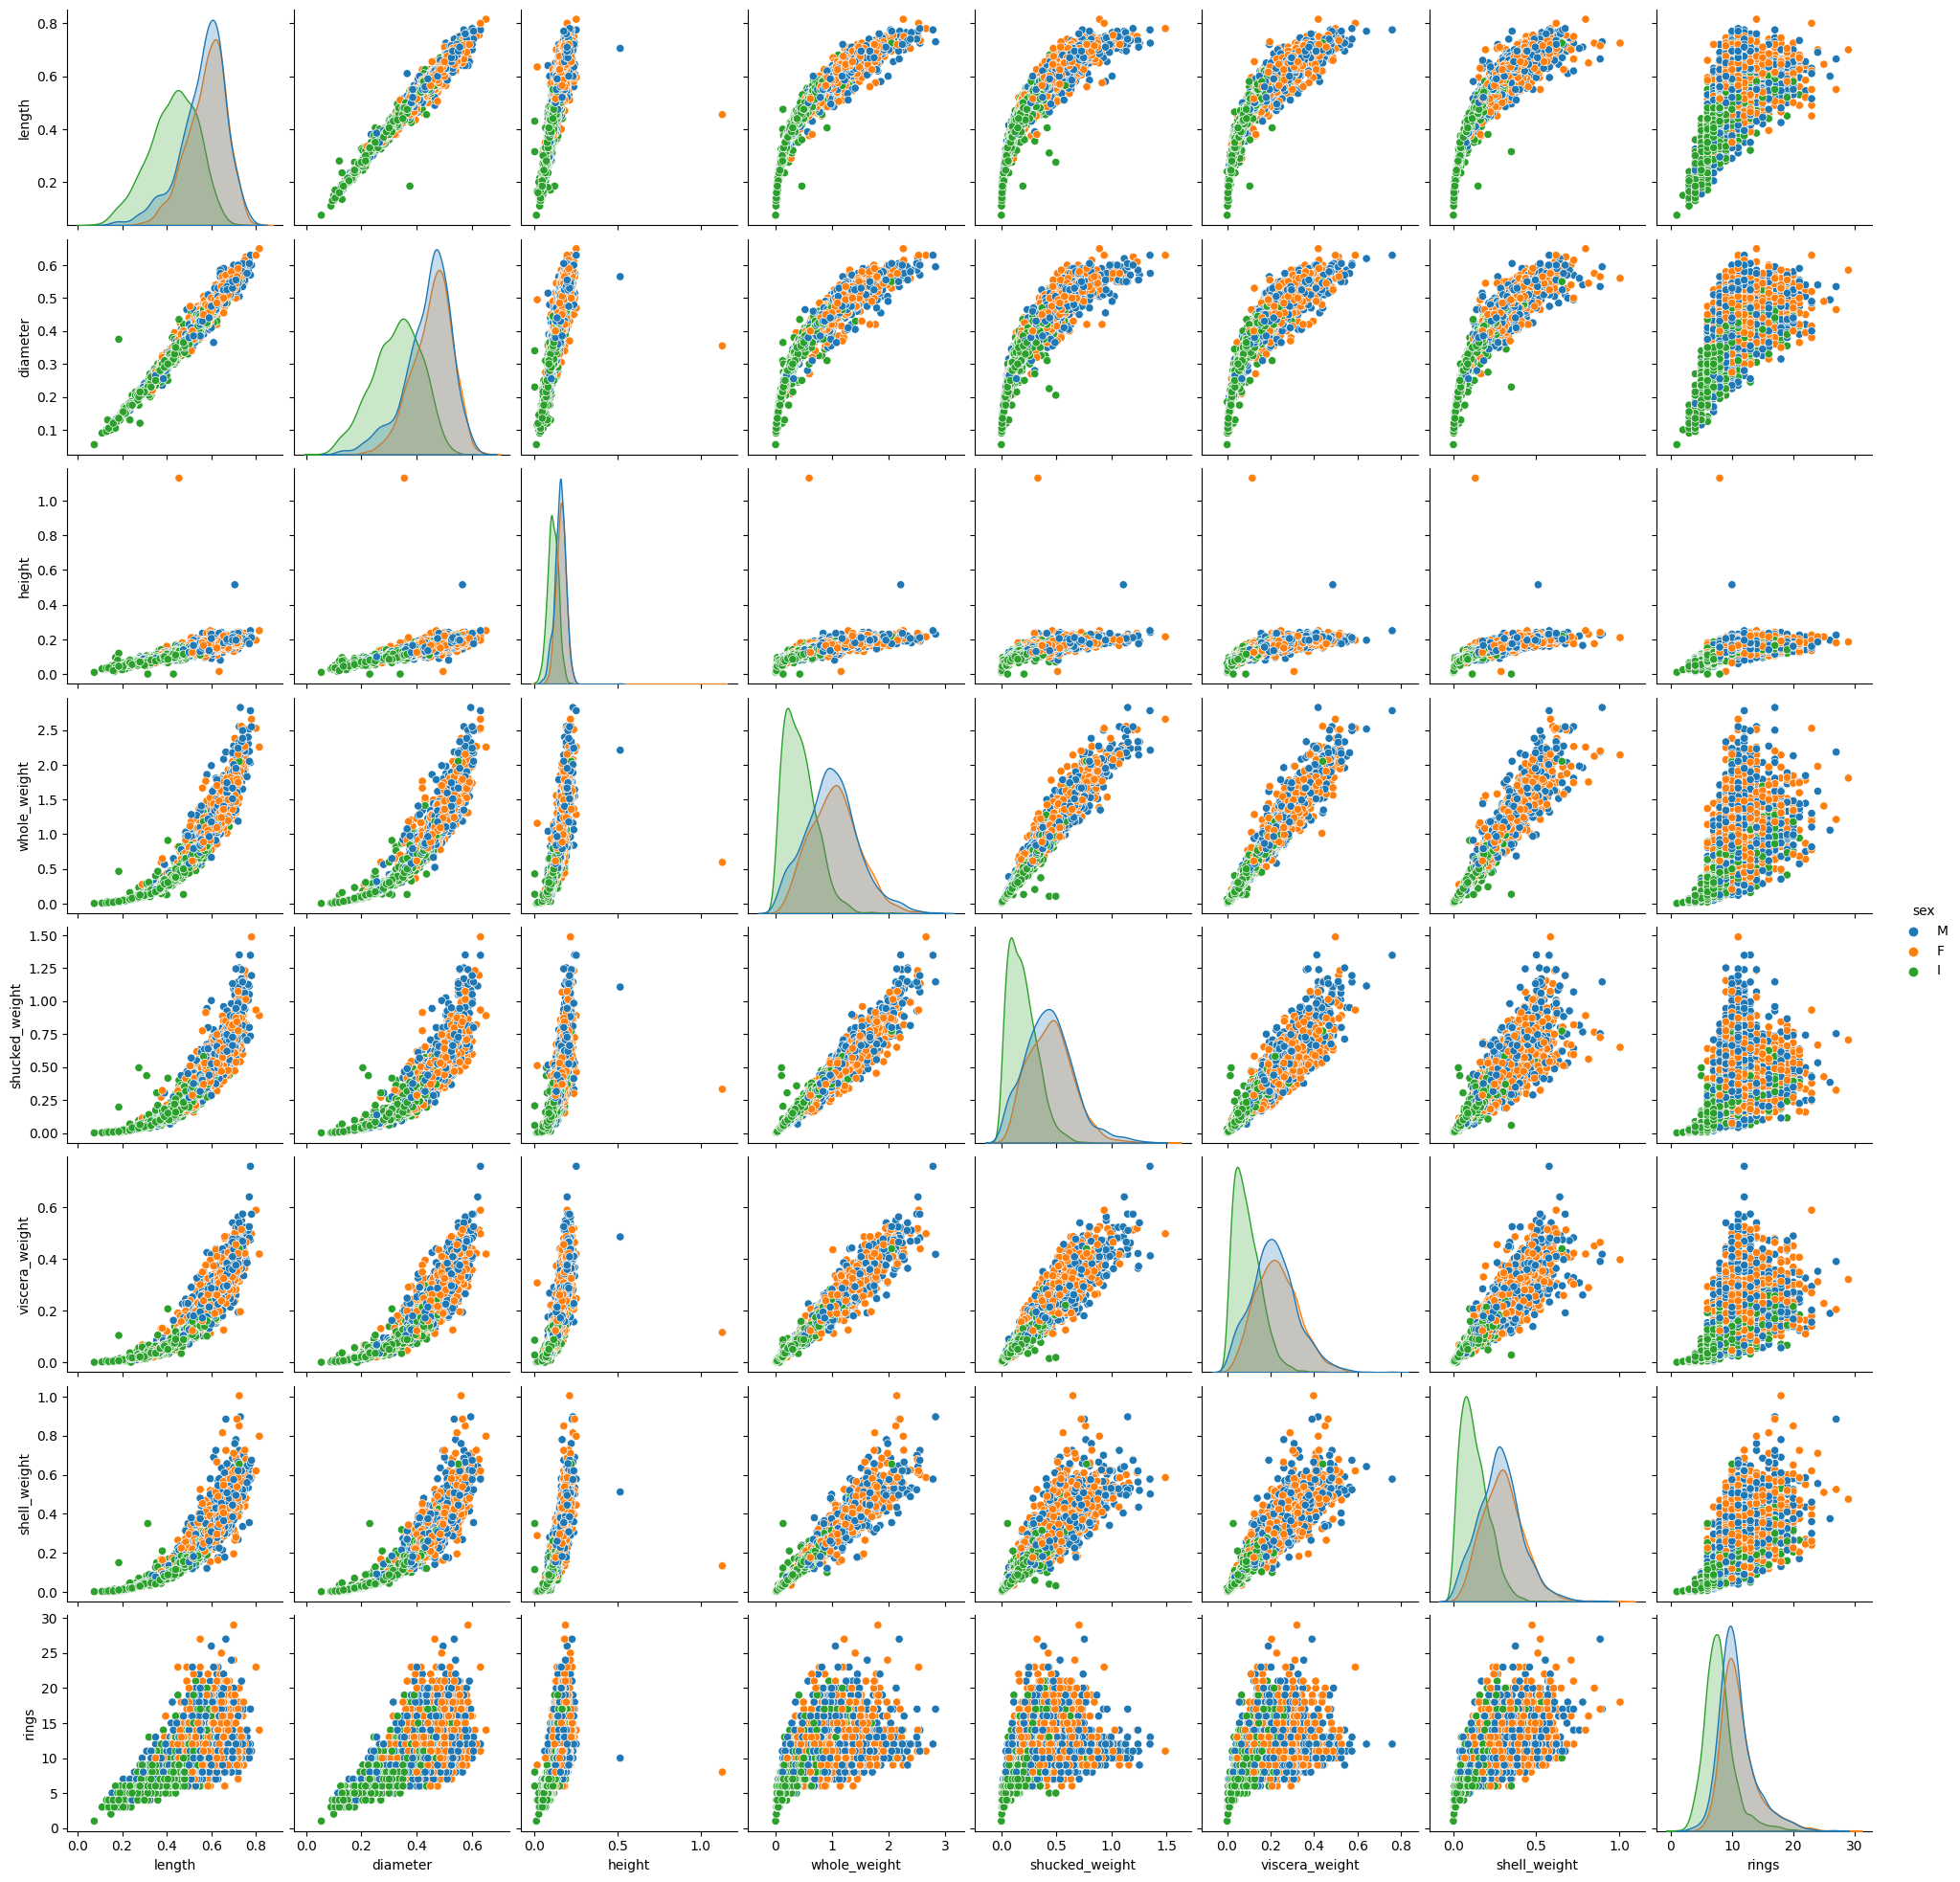

In [16]:
sns.pairplot(data=df, hue='sex')

# Model Building

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
#data splitting

X = df.drop(['sex'], axis=1)
y = df['sex']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
y_predict = rf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
accuracy_score(y_predict, Y_test)

0.5712918660287082

In [24]:
print(classification_report(y_predict, Y_test))

              precision    recall  f1-score   support

           F       0.48      0.48      0.48       327
           I       0.78      0.72      0.75       360
           M       0.47      0.50      0.49       358

    accuracy                           0.57      1045
   macro avg       0.58      0.57      0.57      1045
weighted avg       0.58      0.57      0.57      1045



In [25]:
import pickle
pickle.dump(rf, open("../model/model.pkl", "wb"))

# Best Features

In [26]:

dictionary = {}
for value, key in zip(rf.feature_importances_, rf.feature_names_in_):
    dictionary[key] = value

In [27]:
sorted(dictionary.items(), key=lambda x:x[1], reverse=True)

[('whole_weight', 0.1743949759103463),
 ('viscera_weight', 0.16349876829149404),
 ('shell_weight', 0.14380431560742415),
 ('shucked_weight', 0.13592576753946436),
 ('diameter', 0.09946891234855033),
 ('length', 0.09541841279137098),
 ('rings', 0.0944911084700812),
 ('height', 0.09299773904126854)]

In [28]:
features = df[['viscera_weight', 'whole_weight', 'shell_weight', 'shucked_weight']]
labels = df['sex']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels)

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
y_predict = rf.predict(X_test)


In [32]:

from sklearn.metrics import accuracy_score, classification_report


In [33]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           F       0.43      0.37      0.40       325
           I       0.65      0.75      0.70       351
           M       0.44      0.43      0.44       369

    accuracy                           0.52      1045
   macro avg       0.51      0.52      0.51      1045
weighted avg       0.51      0.52      0.51      1045

